In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
red_sox_2009 = pd.read_csv("C://Users//paulo//Documents//Job Applications//Data_Tests//Higgins//Evaluative Assignment20-21//Red_Sox//red_sox_2009.csv")
red_sox_2010 = pd.read_csv("C://Users//paulo//Documents//Job Applications//Data_Tests//Higgins//Evaluative Assignment20-21//Red_Sox//red_sox_2010.csv")
red_sox_2011 = pd.read_csv("C://Users//paulo//Documents//Job Applications//Data_Tests//Higgins//Evaluative Assignment20-21//Red_Sox//red_sox_2011.csv")
red_sox_2012 = pd.read_csv("C://Users//paulo//Documents//Job Applications//Data_Tests//Higgins//Evaluative Assignment20-21//Red_Sox//red_sox_2012.csv")

In [3]:
red_sox_2009.head()

,transaction_date,sectiontype,price_per_ticket,number_of_tickets,gamemonth,team,day_game,weekend_game,gamedate,logprice,days_from_transaction_until_game
0,2_1,RFGS,45.00,4,JUN,ATL,0.0,1.0,JUN 19,3.806663,142
1,2_1,LowerBleachers,53.00,4,JUN,ATL,0.0,1.0,JUN 20,3.970292,143
2,2_1,IFGS,84.99,4,JUN,ATL,0.0,1.0,JUN 19,4.442533,142
3,2_1,IFGS,151.00,2,JUN,ATL,0.0,1.0,JUN 19,5.017280,142
4,2_1,RFGS,45.74,4,JUN,ATL,1.0,1.0,JUN 21,3.822973,144


In [4]:
(len(red_sox_2009),len(red_sox_2010),len(red_sox_2011),len(red_sox_2012))

(105673, 118895, 152525, 76078)

In [5]:
(len(red_sox_2009.loc[0]),len(red_sox_2010.loc[0]),len(red_sox_2011.loc[0]),len(red_sox_2012.loc[0]))

(11, 11, 11, 11)

In [6]:
# Not many missing values (only day_game and weekend_game missing, and only in 2009 and 2010)
pd.concat([red_sox_2009.isna().sum(),red_sox_2010.isna().sum(),red_sox_2011.isna().sum(),red_sox_2012.isna().sum()],axis=1)

,0,1,2,3
transaction_date,0,0,0,0
sectiontype,0,0,0,0
price_per_ticket,0,0,0,0
number_of_tickets,0,0,0,0
gamemonth,0,0,0,0
team,0,0,0,0
day_game,115,120,0,0
weekend_game,115,120,0,0
gamedate,0,0,0,0
logprice,0,0,0,0


In [7]:
# Add Year column to individual datasets
for i in range(4):
    df = [red_sox_2009,red_sox_2010,red_sox_2011,red_sox_2012][i]
    df['year'] = 2009 + i

In [8]:
# Create a single combined dataset:
red_sox = red_sox_2009.copy()
red_sox = red_sox.append([red_sox_2010,red_sox_2011,red_sox_2012])
red_sox

,transaction_date,sectiontype,price_per_ticket,number_of_tickets,gamemonth,team,day_game,weekend_game,gamedate,logprice,days_from_transaction_until_game,year
0,2_1,RFGS,45.00,4,JUN,ATL,0.0,1.0,JUN 19,3.806663,142,2009
1,2_1,LowerBleachers,53.00,4,JUN,ATL,0.0,1.0,JUN 20,3.970292,143,2009
2,2_1,IFGS,84.99,4,JUN,ATL,0.0,1.0,JUN 19,4.442533,142,2009
3,2_1,IFGS,151.00,2,JUN,ATL,0.0,1.0,JUN 19,5.017280,142,2009
4,2_1,RFGS,45.74,4,JUN,ATL,1.0,1.0,JUN 21,3.822973,144,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
76073,6_8,RFFieldBox,54.94,3,JUN,WAS,0.0,1.0,JUN 8,4.006242,0,2012
76074,6_10,IFGS,29.00,2,JUN,WAS,1.0,1.0,JUN 10,3.367296,0,2012
76075,6_7,UpperBleachers,18.93,2,JUN,WAS,0.0,1.0,JUN 8,2.940748,1,2012
76076,4_22,LogeBox,139.00,2,JUN,WAS,1.0,1.0,JUN 9,4.934474,49,2012


In [9]:
# Clean the transaction date column so that it has the DateTime type
trans_month_day = red_sox['transaction_date'].str.split(pat='_',expand=True).astype('int64')
red_sox['transaction_date'] = pd.to_datetime(red_sox['year']*10000+trans_month_day[0]*100+trans_month_day[1],format='%Y%m%d')
red_sox

,transaction_date,sectiontype,price_per_ticket,number_of_tickets,gamemonth,team,day_game,weekend_game,gamedate,logprice,days_from_transaction_until_game,year
0,2009-02-01,RFGS,45.00,4,JUN,ATL,0.0,1.0,JUN 19,3.806663,142,2009
1,2009-02-01,LowerBleachers,53.00,4,JUN,ATL,0.0,1.0,JUN 20,3.970292,143,2009
2,2009-02-01,IFGS,84.99,4,JUN,ATL,0.0,1.0,JUN 19,4.442533,142,2009
3,2009-02-01,IFGS,151.00,2,JUN,ATL,0.0,1.0,JUN 19,5.017280,142,2009
4,2009-02-01,RFGS,45.74,4,JUN,ATL,1.0,1.0,JUN 21,3.822973,144,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
76073,2012-06-08,RFFieldBox,54.94,3,JUN,WAS,0.0,1.0,JUN 8,4.006242,0,2012
76074,2012-06-10,IFGS,29.00,2,JUN,WAS,1.0,1.0,JUN 10,3.367296,0,2012
76075,2012-06-07,UpperBleachers,18.93,2,JUN,WAS,0.0,1.0,JUN 8,2.940748,1,2012
76076,2012-04-22,LogeBox,139.00,2,JUN,WAS,1.0,1.0,JUN 9,4.934474,49,2012


In [10]:
red_sox['gamedate'] = red_sox['gamedate'].str.title()
red_sox['gamedate'] = red_sox['gamedate'] + ", " + red_sox['year'].astype('str')
red_sox['gamedate'] = pd.to_datetime(red_sox['gamedate'],format="%b %d, %Y")
red_sox

,transaction_date,sectiontype,price_per_ticket,number_of_tickets,gamemonth,team,day_game,weekend_game,gamedate,logprice,days_from_transaction_until_game,year
0,2009-02-01,RFGS,45.00,4,JUN,ATL,0.0,1.0,2009-06-19,3.806663,142,2009
1,2009-02-01,LowerBleachers,53.00,4,JUN,ATL,0.0,1.0,2009-06-20,3.970292,143,2009
2,2009-02-01,IFGS,84.99,4,JUN,ATL,0.0,1.0,2009-06-19,4.442533,142,2009
3,2009-02-01,IFGS,151.00,2,JUN,ATL,0.0,1.0,2009-06-19,5.017280,142,2009
4,2009-02-01,RFGS,45.74,4,JUN,ATL,1.0,1.0,2009-06-21,3.822973,144,2009
...,...,...,...,...,...,...,...,...,...,...,...,...
76073,2012-06-08,RFFieldBox,54.94,3,JUN,WAS,0.0,1.0,2012-06-08,4.006242,0,2012
76074,2012-06-10,IFGS,29.00,2,JUN,WAS,1.0,1.0,2012-06-10,3.367296,0,2012
76075,2012-06-07,UpperBleachers,18.93,2,JUN,WAS,0.0,1.0,2012-06-08,2.940748,1,2012
76076,2012-04-22,LogeBox,139.00,2,JUN,WAS,1.0,1.0,2012-06-09,4.934474,49,2012


In [11]:
red_sox['days_before'] = (red_sox['gamedate'] - red_sox['transaction_date']).dt.days

In [12]:
red_sox['days_before'].describe()

count    453171.000000
mean         32.354581
std          40.945545
min           0.000000
25%           3.000000
50%          15.000000
75%          47.000000
max         245.000000
Name: days_before, dtype: float64

In [13]:
red_sox['ticket_payment'] = red_sox['price_per_ticket'] * red_sox['number_of_tickets']
red_sox.head()

,transaction_date,sectiontype,price_per_ticket,number_of_tickets,gamemonth,team,day_game,weekend_game,gamedate,logprice,days_from_transaction_until_game,year,days_before,ticket_payment
0,2009-02-01,RFGS,45.00,4,JUN,ATL,0.0,1.0,2009-06-19,3.806663,142,2009,138,180.00
1,2009-02-01,LowerBleachers,53.00,4,JUN,ATL,0.0,1.0,2009-06-20,3.970292,143,2009,139,212.00
2,2009-02-01,IFGS,84.99,4,JUN,ATL,0.0,1.0,2009-06-19,4.442533,142,2009,138,339.96
3,2009-02-01,IFGS,151.00,2,JUN,ATL,0.0,1.0,2009-06-19,5.017280,142,2009,138,302.00
4,2009-02-01,RFGS,45.74,4,JUN,ATL,1.0,1.0,2009-06-21,3.822973,144,2009,140,182.96


In [14]:
days_tickets = red_sox.groupby('days_before').sum().reset_index()[['days_before','number_of_tickets','ticket_payment']]
days_tickets.head()

,days_before,number_of_tickets,ticket_payment
0,0,118307,6.837704e+06
1,1,84187,5.678694e+06
2,2,59222,4.355022e+06
3,3,48441,3.734528e+06
4,4,43496,3.415791e+06


In [15]:
days_tickets['avg_price'] = days_tickets['ticket_payment'] / days_tickets['number_of_tickets']
days_tickets.head()

,days_before,number_of_tickets,ticket_payment,avg_price
0,0,118307,6.837704e+06,57.796275
1,1,84187,5.678694e+06,67.453332
2,2,59222,4.355022e+06,73.537227
3,3,48441,3.734528e+06,77.094369
4,4,43496,3.415791e+06,78.531141


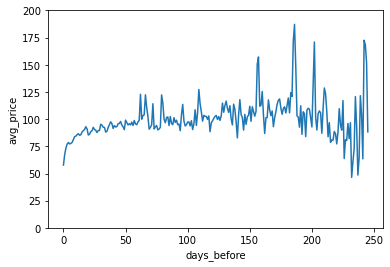

In [16]:
plt.ylim(0,200)
sns.lineplot(x='days_before',y='avg_price',data=days_tickets);

In [17]:
# There are no skipped days. We can use a simple way to calculate a 7 day rolling average.
days_tickets['days_before'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [18]:
days_tickets['roll_avg'] = days_tickets['avg_price'].rolling(7).mean().shift(-3)
days_tickets.head()

,days_before,number_of_tickets,ticket_payment,avg_price,roll_avg
0,0,118307,6.837704e+06,57.796275,NaN
1,1,84187,5.678694e+06,67.453332,NaN
2,2,59222,4.355022e+06,73.537227,NaN
3,3,48441,3.734528e+06,77.094369,72.767337
4,4,43496,3.415791e+06,78.531141,75.744459


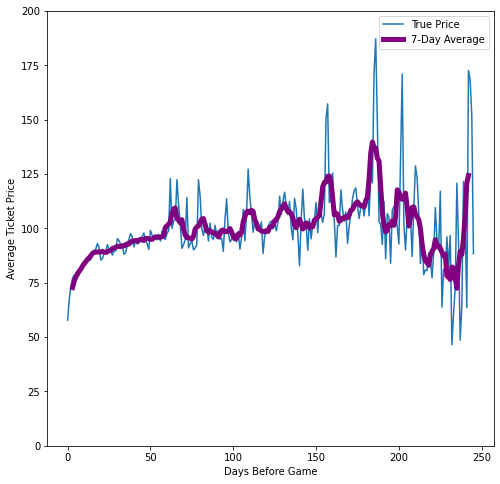

In [19]:
fig, ax = plt.subplots(figsize = (8,8))
plt.ylim(0,200)
sns.lineplot(x='days_before',y='avg_price',data=days_tickets)
sns.lineplot(x='days_before',y='roll_avg',color = 'purple',lw = 5,data=days_tickets)
plt.xlabel('Days Before Game')
plt.ylabel('Average Ticket Price')
plt.legend(labels=['True Price','7-Day Average']);

In [20]:
# Now I look at the relationship across years:

In [21]:
days_tickets_yr = red_sox.groupby(['days_before','year']).sum().reset_index()[['days_before','year','number_of_tickets','ticket_payment']]
days_tickets_yr.head()

,days_before,year,number_of_tickets,ticket_payment
0,0,2009,19795,1.469577e+06
1,0,2010,28325,1.519326e+06
2,0,2011,49410,3.061177e+06
3,0,2012,20777,7.876236e+05
4,1,2009,12383,1.085050e+06


In [22]:
days_tickets_yr['avg_price'] = days_tickets_yr['ticket_payment'] / days_tickets_yr['number_of_tickets']
days_tickets_yr.head()

,days_before,year,number_of_tickets,ticket_payment,avg_price
0,0,2009,19795,1.469577e+06,74.239825
1,0,2010,28325,1.519326e+06,53.639032
2,0,2011,49410,3.061177e+06,61.954611
3,0,2012,20777,7.876236e+05,37.908440
4,1,2009,12383,1.085050e+06,87.624196


In [23]:
days_tickets_2009 = days_tickets_yr[days_tickets_yr['year'] == 2009]
days_tickets_2010 = days_tickets_yr[days_tickets_yr['year'] == 2010]
days_tickets_2011 = days_tickets_yr[days_tickets_yr['year'] == 2011]
days_tickets_2012 = days_tickets_yr[days_tickets_yr['year'] == 2012]

In [24]:
# I will remove all values >=233 from all these datasets to make the calculation of the 7-day rolling average easier.
for i in range(246):
    if i not in days_tickets_2009['days_before'].unique():
        print(i,2009)
    if i not in days_tickets_2010['days_before'].unique():
        print(i,2010)
    if i not in days_tickets_2011['days_before'].unique():
        print(i,2011)
    if i not in days_tickets_2012['days_before'].unique():
        print(i,2012)

233 2011
234 2010
234 2011
235 2011
236 2011
236 2012
237 2009
237 2010
237 2011
238 2011
239 2011
239 2012
240 2011
240 2012
241 2011
241 2012
242 2011
242 2012
243 2011
243 2012
244 2011
244 2012
245 2010
245 2011
245 2012


In [25]:
days_tickets_2009 = days_tickets_2009[days_tickets_2009['days_before'] < 233]
days_tickets_2010 = days_tickets_2010[days_tickets_2010['days_before'] < 233]
days_tickets_2011 = days_tickets_2011[days_tickets_2011['days_before'] < 233]
days_tickets_2012 = days_tickets_2012[days_tickets_2012['days_before'] < 233]

In [26]:
days_tickets_2009['roll_avg_7'] = days_tickets_2009['avg_price'].rolling(7).mean().shift(-3)
days_tickets_2010['roll_avg_7'] = days_tickets_2010['avg_price'].rolling(7).mean().shift(-3)
days_tickets_2011['roll_avg_7'] = days_tickets_2011['avg_price'].rolling(7).mean().shift(-3)
days_tickets_2012['roll_avg_7'] = days_tickets_2012['avg_price'].rolling(7).mean().shift(-3)
days_tickets_2009['roll_avg_14'] = days_tickets_2009['avg_price'].rolling(14).mean().shift(-3)
days_tickets_2010['roll_avg_14'] = days_tickets_2010['avg_price'].rolling(14).mean().shift(-3)
days_tickets_2011['roll_avg_14'] = days_tickets_2011['avg_price'].rolling(14).mean().shift(-3)
days_tickets_2012['roll_avg_14'] = days_tickets_2012['avg_price'].rolling(14).mean().shift(-3)
days_tickets_2009.head()

,days_before,year,number_of_tickets,ticket_payment,avg_price,roll_avg_7,roll_avg_14
0,0,2009,19795,1.469577e+06,74.239825,NaN,NaN
4,1,2009,12383,1.085050e+06,87.624196,NaN,NaN
8,2,2009,10709,9.648754e+05,90.099486,NaN,NaN
12,3,2009,9985,9.101904e+05,91.155778,88.104987,NaN
16,4,2009,9488,8.676301e+05,91.444992,90.648157,NaN


In [27]:
days_tickets_yearly = days_tickets_2009.append([days_tickets_2010,days_tickets_2011,days_tickets_2012])
days_tickets_yearly

,days_before,year,number_of_tickets,ticket_payment,avg_price,roll_avg_7,roll_avg_14
0,0,2009,19795,1.469577e+06,74.239825,NaN,NaN
4,1,2009,12383,1.085050e+06,87.624196,NaN,NaN
8,2,2009,10709,9.648754e+05,90.099486,NaN,NaN
12,3,2009,9985,9.101904e+05,91.155778,88.104987,NaN
16,4,2009,9488,8.676301e+05,91.444992,90.648157,NaN
...,...,...,...,...,...,...,...
915,228,2012,2,4.400000e+01,22.000000,89.991005,110.025961
919,229,2012,2,2.900000e+02,145.000000,76.537891,108.151199
923,230,2012,7,6.610000e+02,94.428571,NaN,NaN
927,231,2012,4,2.530000e+02,63.250000,NaN,NaN


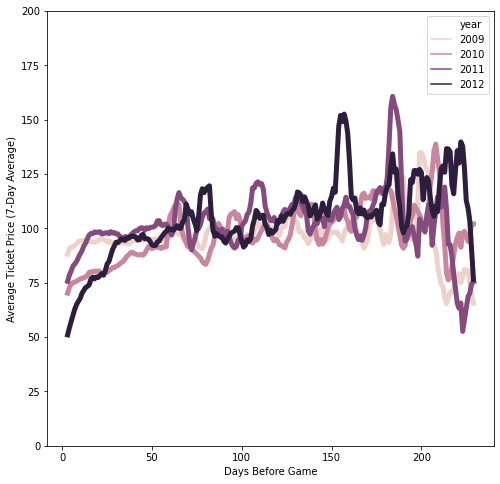

In [28]:
# This is a bit noisy
fig, ax = plt.subplots(figsize = (8,8))
plt.ylim(0,200)
sns.lineplot(x='days_before',y='roll_avg_7', hue = 'year',lw = 5,data=days_tickets_yearly)
plt.xlabel('Days Before Game')
plt.ylabel('Average Ticket Price (7-Day Average)');

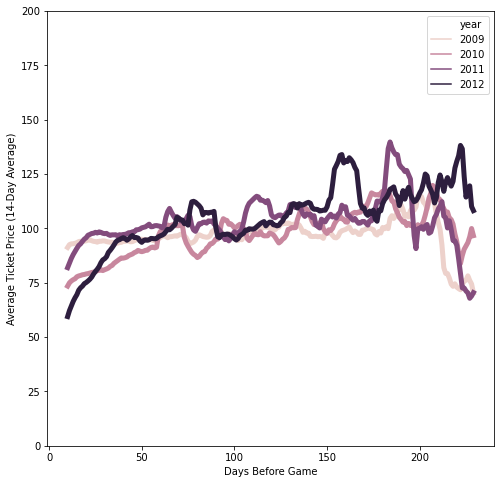

In [29]:
fig, ax = plt.subplots(figsize = (8,8))
plt.ylim(0,200)
sns.lineplot(x='days_before',y='roll_avg_14', hue = 'year',lw = 5,data=days_tickets_yearly)
plt.xlabel('Days Before Game')
plt.ylabel('Average Ticket Price (14-Day Average)');

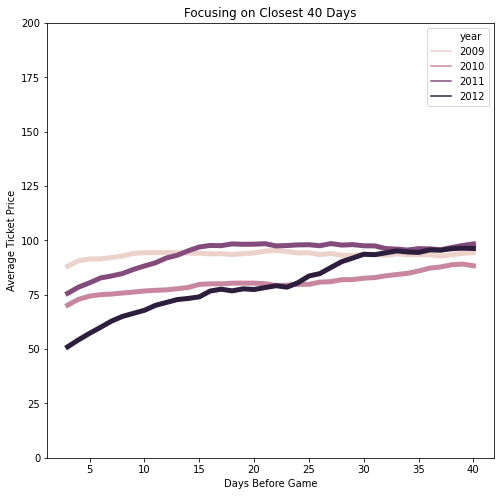

In [30]:
fig, ax = plt.subplots(figsize = (8,8))
plt.ylim(0,200)
sns.lineplot(x='days_before',y='roll_avg_7', hue = 'year',lw = 5,data=days_tickets_yearly[days_tickets_yearly['days_before'] <= 40])
plt.xlabel('Days Before Game')
plt.ylabel('Average Ticket Price')
plt.title('Focusing on Closest 40 Days');

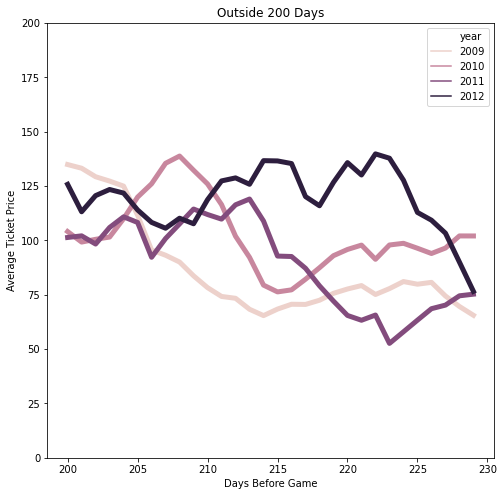

In [31]:
fig, ax = plt.subplots(figsize = (8,8))
plt.ylim(0,200)
sns.lineplot(x='days_before',y='roll_avg_7', hue = 'year',lw = 5,data=days_tickets_yearly[days_tickets_yearly['days_before'] >= 200])
plt.xlabel('Days Before Game')
plt.ylabel('Average Ticket Price')
plt.title('Outside 200 Days');

In [32]:
red_sox.groupby('days_before').count()['transaction_date'][:41].mean()

7922.975609756098

In [33]:
red_sox.groupby('days_before').count()['transaction_date'][100:131].mean()

600.3225806451613

In [34]:
red_sox.groupby('days_before').count()['transaction_date'][200:231].mean()

71.41935483870968